In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist

C:\Users\moham\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()

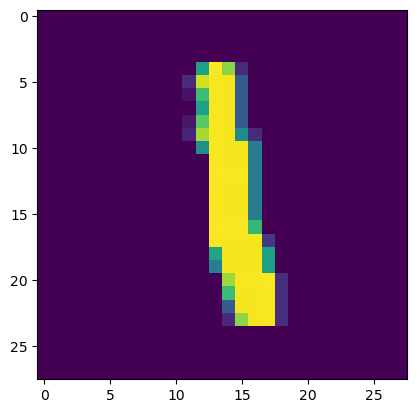

In [4]:
plt.imshow(X_train[6])

**Data Normalization**

In [5]:
X_train=X_train/255
X_test=X_test/255

**Generating pictures with noise**

In [6]:
from tensorflow.keras.layers import GaussianNoise

In [7]:
sample=GaussianNoise(0.2)
#the larger value the more noise added

In [8]:
noisey=sample(X_test[:10],training=True)
#training=True means adding noise

original


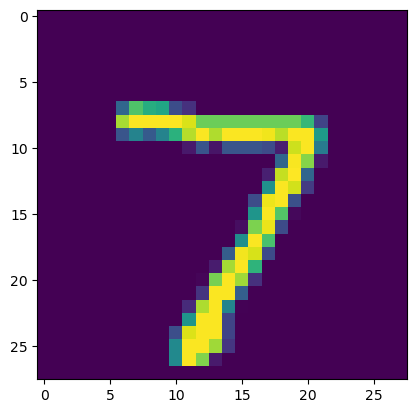

noisy_image


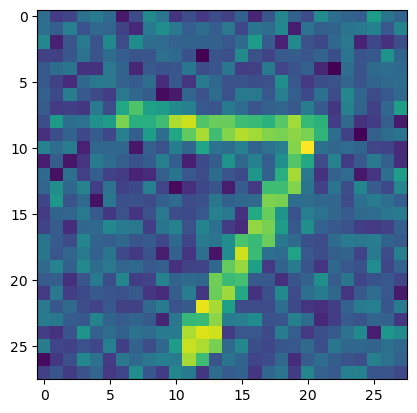

In [9]:
n=0
print("original")
plt.imshow(X_test[n])
plt.show()
print("noisy_image")
plt.imshow(noisey[n])

**Creating an auto encoder to remove the noise**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [12]:
#Making an encoder
encoder=Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400, activation='relu'))
#we would slowly decrease the dimention
encoder.add(Dense(200, activation='relu'))
encoder.add(Dense(100, activation='relu'))
encoder.add(Dense(50, activation='relu'))
encoder.add(Dense(25, activation='relu'))

C:\Users\moham\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
decoder=Sequential()
#note: decoder neurons are the reverse of the enocder until you reach the first amount!
decoder.add(Dense(50, input_shape=[25], activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

C:\Users\moham\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
noise_remover=Sequential([encoder,decoder])

In [15]:
noise_remover.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
noise_remover.fit(X_train, X_train, epochs=8)

Epoch 1/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1378 - loss: 0.2165
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2295 - loss: 0.1352
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2494 - loss: 0.1189
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2606 - loss: 0.1117
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2685 - loss: 0.1081
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2742 - loss: 0.1051
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2794 - loss: 0.1031
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2840 - loss: 0.1017


In [17]:
ten_noisy_images=sample(X_test[:10], training=True)

In [18]:
denoised=noise_remover(ten_noisy_images)

**Results**

original figure


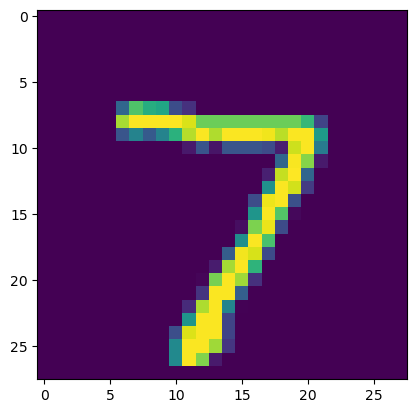

noisy figure


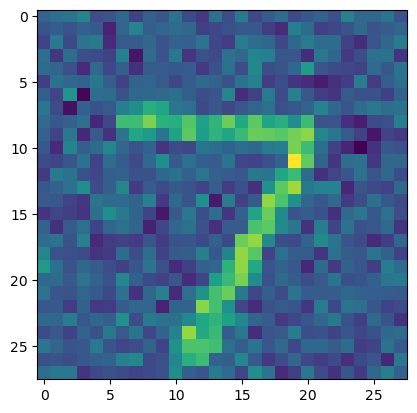

noise_removed_figure


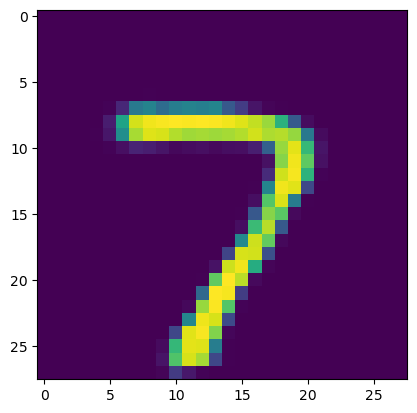

In [20]:
n=0
print("original figure")
plt.imshow(X_test[n])
plt.show()
print("noisy figure")
plt.imshow(ten_noisy_images[n])
plt.show()
print("noise_removed_figure")
plt.imshow(denoised[n])